In [198]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Exploratory data analysis

In [199]:
# Load the dataset
df = pd.read_csv('dataset.csv')
df[:3]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0


In [200]:
#General info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [201]:
# Check for missing values
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [202]:
# Handle missing values 
# Fill missing values in 'education' with the mode
df['education'].fillna(df['education'].mode()[0], inplace=True)

# Assuming 'previous_year_rating' might have missing values (e.g., NaN)
df['previous_year_rating'].fillna(df['previous_year_rating'].mode()[0], inplace=True)

In [203]:
# Check if all in order
df.isnull().sum().sum()

0

In [204]:
# Get descriptive statistics for numeric columns
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.304481,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.214770,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000



**department Distribution:**
department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64


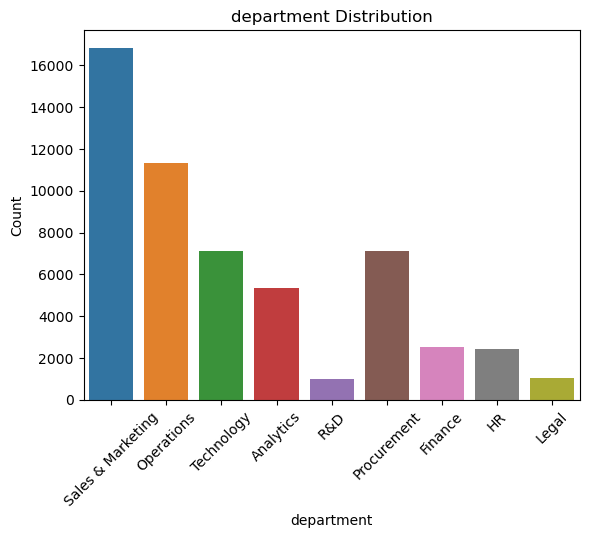


**region Distribution:**
region
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: count, dtype: int64


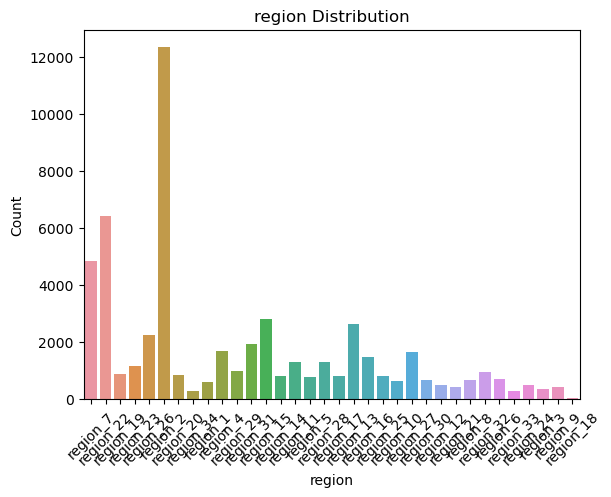


**education Distribution:**
education
Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64


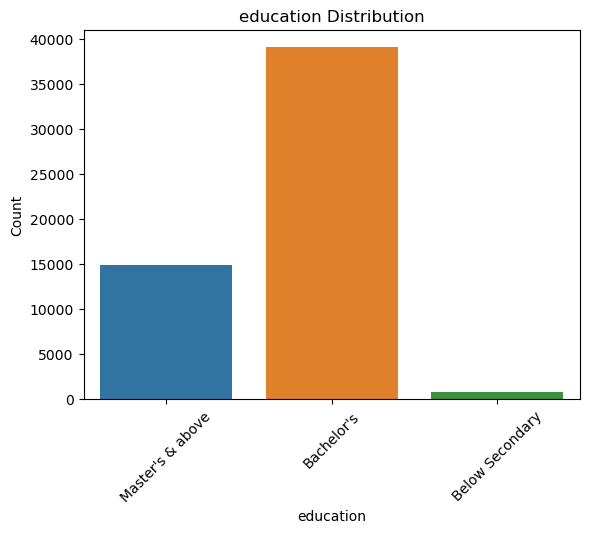


**gender Distribution:**
gender
m    38496
f    16312
Name: count, dtype: int64


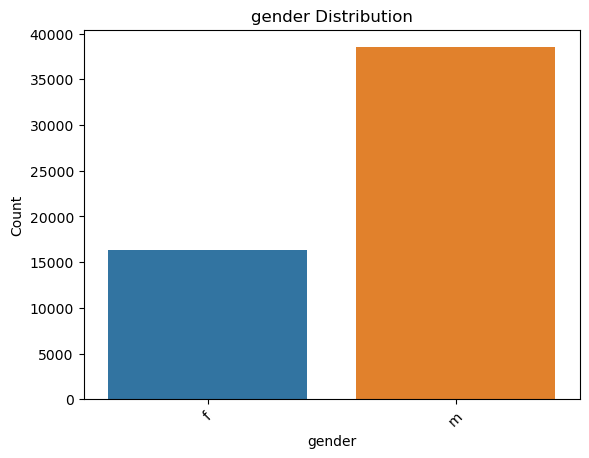


**recruitment_channel Distribution:**
recruitment_channel
other       30446
sourcing    23220
referred     1142
Name: count, dtype: int64


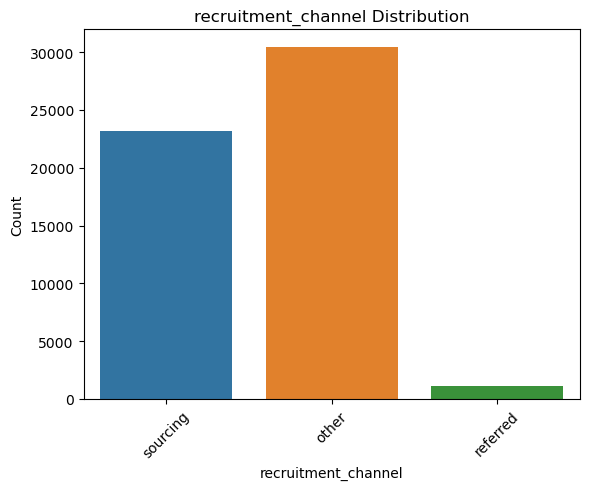


**is_promoted Distribution:**
is_promoted
0    50140
1     4668
Name: count, dtype: int64


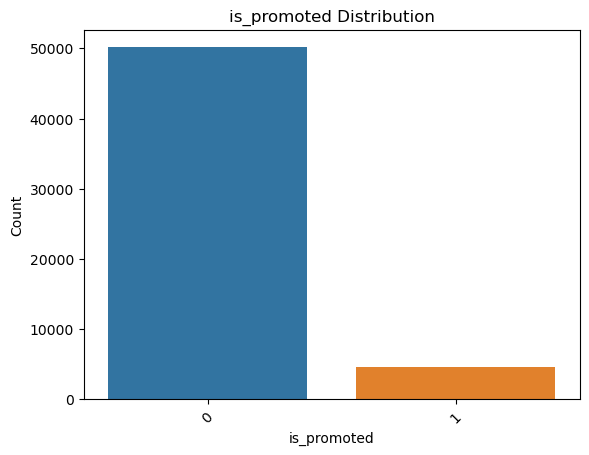

In [205]:
# Analyze categorical features: department, region, education, gender, recruitment_channel
for col in ['department', 'region', 'education', 'gender', 'recruitment_channel', 'is_promoted']:
    print(f"\n**{col} Distribution:**")
    print(df[col].value_counts())

    # Visualize categorical features with countplots or bar charts
    sns.countplot(x=col, data=df)  # Or plt.bar(df[col].value_counts().index, df[col].value_counts().values)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed for readability
    plt.show()

    # Consider chi-square tests for associations between categorical variables and 'is_promoted'
    # ... (code for chi-square tests)


**no_of_trainings Distribution:**
count    54808.000000
mean         1.253011
std          0.609264
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         10.000000
Name: no_of_trainings, dtype: float64


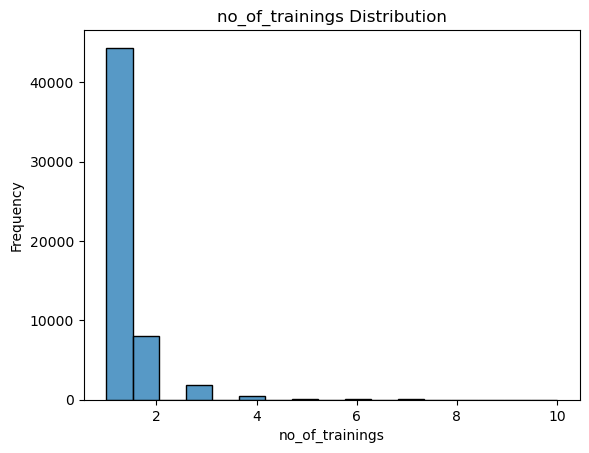


**age Distribution:**
count    54808.000000
mean        34.803915
std          7.660169
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         60.000000
Name: age, dtype: float64


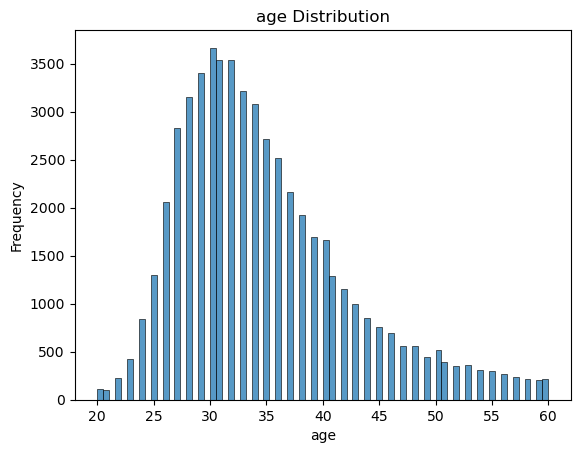


**previous_year_rating Distribution:**
count    54808.000000
mean         3.304481
std          1.214770
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: previous_year_rating, dtype: float64


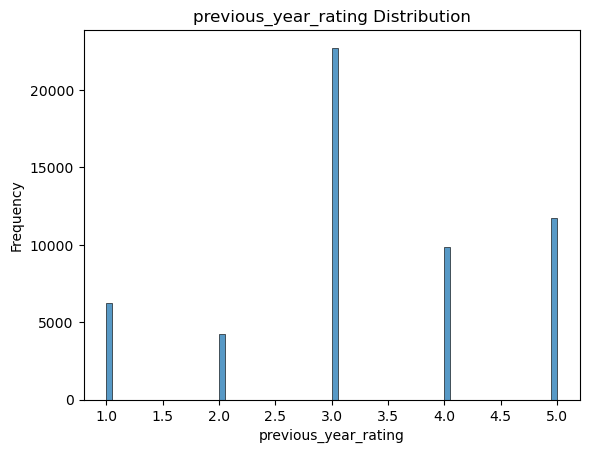


**length_of_service Distribution:**
count    54808.000000
mean         5.865512
std          4.265094
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         37.000000
Name: length_of_service, dtype: float64


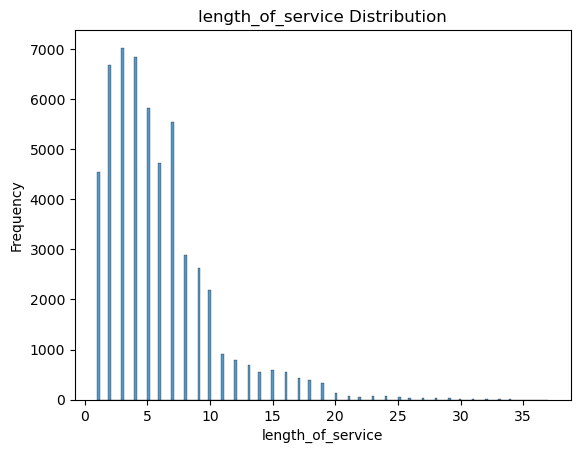


**avg_training_score Distribution:**
count    54808.000000
mean        63.386750
std         13.371559
min         39.000000
25%         51.000000
50%         60.000000
75%         76.000000
max         99.000000
Name: avg_training_score, dtype: float64


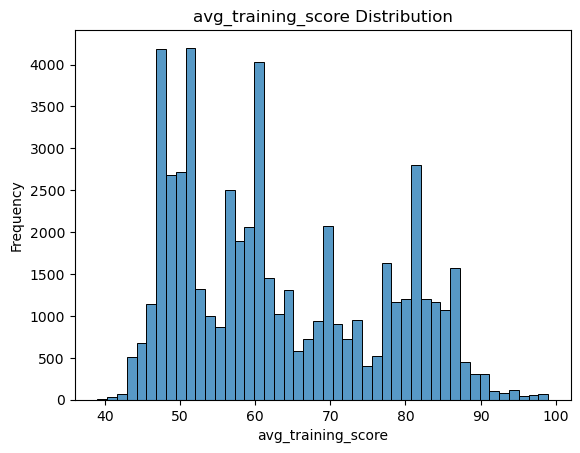

In [206]:
# Analyze numeric features: nooftrainings, age, previousyearrating, lengthofservice, avgtrainingscore
for col in ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score']:
    print(f"\n**{col} Distribution:**")
    print(df[col].describe())

    # Visualize numeric features with histograms or box plots
    sns.histplot(data=df, x=col)  # Or plt.hist(df[col])
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f"{col} Distribution")
    plt.show()


**KPIs_met Distribution:**
KPIs_met >80%
0    0.648026
1    0.351974
Name: proportion, dtype: float64


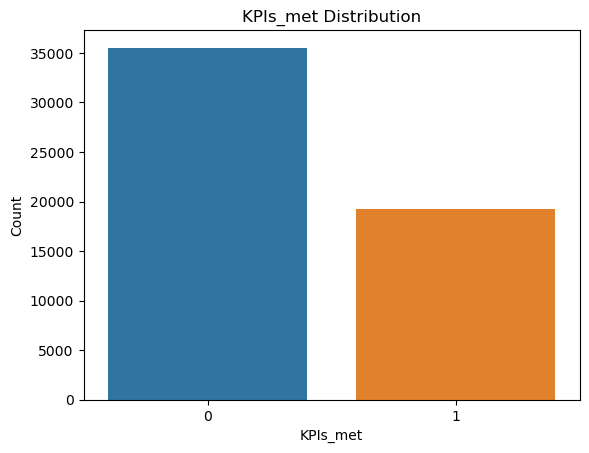

In [207]:
# Analyze KPIs_met and awards_won? (binary features)
print("\n**KPIs_met Distribution:**")
print(df['KPIs_met >80%'].value_counts(normalize=True))  # Show percentages

sns.countplot(x='KPIs_met >80%', data=df)
plt.xlabel('KPIs_met')
plt.ylabel('Count')
plt.title("KPIs_met Distribution")
plt.show()


**awards_won? Distribution:**
awards_won?
0    0.976828
1    0.023172
Name: proportion, dtype: float64


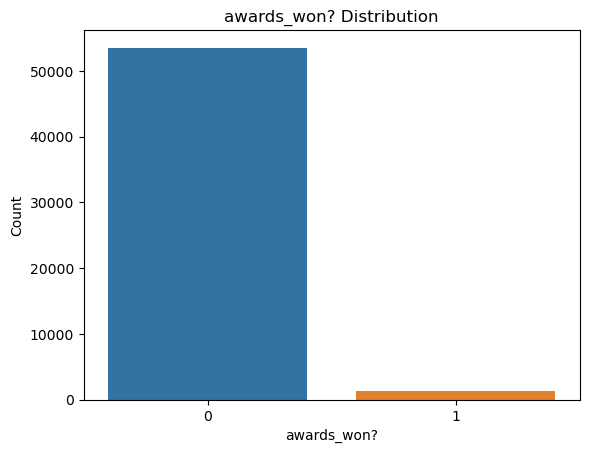

In [208]:
print("\n**awards_won? Distribution:**")
print(df['awards_won?'].value_counts(normalize=True))

sns.countplot(x='awards_won?', data=df)
plt.xlabel('awards_won?')
plt.ylabel('Count')
plt.title("awards_won? Distribution")
plt.show()


**is_promoted Distribution:**
is_promoted
0    0.91483
1    0.08517
Name: proportion, dtype: float64


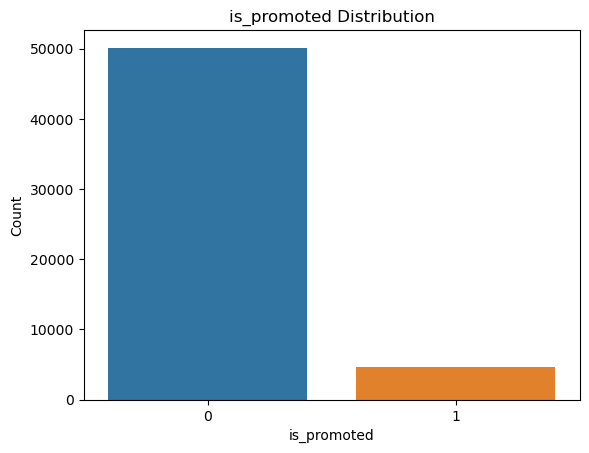

In [209]:
# Analyze target variable (is_promoted)
print(f"\n**is_promoted Distribution:**")
print(df['is_promoted'].value_counts(normalize=True))

sns.countplot(x='is_promoted', data=df)
plt.xlabel('is_promoted')
plt.ylabel('Count')
plt.title("is_promoted Distribution")
plt.show()

In [210]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

### Features preparation

In [212]:
# Define features and target
target = 'is_promoted'
numeric_features = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score']
categorical_features = ['department', 'region', 'education', 'gender', 'recruitment_channel', 'KPIs_met >80%', 'awards_won?']

In [213]:
# One-hot encode categorical features
df = pd.get_dummies(df, columns=categorical_features)

# Split data into features and target
X = df.drop([target, 'employee_id'], axis=1)
y = df[target]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

### Hyperparameter selection and model training

In [233]:
grid_searcher = GridSearchCV(KNeighborsClassifier(),
                             param_grid={'n_neighbors': range(1, 15, 2),
                                         'weights': ['uniform', 'distance'],
                                         'p': [1, 2, 3]
                                        },
                             cv=5)

In [234]:
# Train the model
grid_searcher.fit(X_train, y_train)

# Make predictions on test data
y_pred = grid_searcher.predict(X_test)

In [235]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9221
Precision: 0.8462
Recall: 0.0727
F1 Score: 0.1339
